In [30]:
import winsound

frequency = 60
duration = 10000

winsound.Beep(frequency, duration)

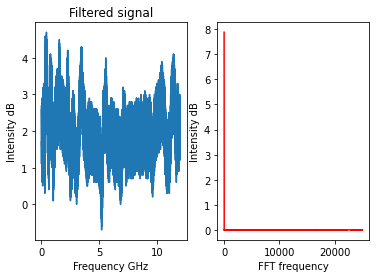

The ripple period is inf MHz


C:\Users\danhe\AppData\Local\Temp\ipykernel_3380\3602143186.py:60: RuntimeWarning: divide by zero encountered in double_scalars
  ripple_period = 1 / peak * 1000


In [19]:
import numpy as np
import pylab as plt
from scipy import signal as signal


# Defining a high pass filter
def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y


with open(r'C:\Users\danhe\Documents\Test Stand 3khz at 50khz sampling.csv', 'r') as fil:
    data = np.genfromtxt(fil, delimiter=',', skip_header=False)

m1 = data[:, 0]
m2 = data[:, 1]


# Determine the sampling frequency of the data (it is around 500 Hz)
fs = 50000

# Apply a median filter to remove the noise
#amp = signal.medfilt(m1)

# Apply a highpass filter to remove the low frequency components 5 Hz was chosen
# as the cutoff fequency by visual inspection. Depending on the problem, you
# might want to choose a different value

cutoff_freq = 0.5

#amp = butter_highpass_filter(amp, cutoff_freq, fs)
freq = np.linspace(0,12,600000)
_, ax = plt.subplots(ncols=2, nrows=1)
ax[0].plot(freq, m1)
ax[0].set_xlabel('Frequency GHz')
ax[0].set_ylabel('Intensity dB')
ax[0].set_title('Filtered signal')

# The FFT part is as follows

fft_amp = np.abs(np.fft.fft(m1, m1.size))
fft_amp = fft_amp[0:fft_amp.size // 2]
fft_freq = np.linspace(0, fs / 2, fft_amp.size)

ax[1].plot(fft_freq, 2 / fft_amp.size * fft_amp, 'r-')  # the red plot
ax[1].set_xlabel('FFT frequency')
ax[1].set_ylabel('Intensity dB')

plt.show()

peak = fft_freq[np.argmax(fft_amp)]

ripple_period = 1 / peak * 1000

print(f'The ripple period is {ripple_period} MHz')

In [17]:
print()

[ 0.          0.02003339  0.04006678  0.06010017  0.08013356  0.10016694
  0.12020033  0.14023372  0.16026711  0.1803005   0.20033389  0.22036728
  0.24040067  0.26043406  0.28046745  0.30050083  0.32053422  0.34056761
  0.360601    0.38063439  0.40066778  0.42070117  0.44073456  0.46076795
  0.48080134  0.50083472  0.52086811  0.5409015   0.56093489  0.58096828
  0.60100167  0.62103506  0.64106845  0.66110184  0.68113523  0.70116861
  0.721202    0.74123539  0.76126878  0.78130217  0.80133556  0.82136895
  0.84140234  0.86143573  0.88146912  0.9015025   0.92153589  0.94156928
  0.96160267  0.98163606  1.00166945  1.02170284  1.04173623  1.06176962
  1.08180301  1.10183639  1.12186978  1.14190317  1.16193656  1.18196995
  1.20200334  1.22203673  1.24207012  1.26210351  1.28213689  1.30217028
  1.32220367  1.34223706  1.36227045  1.38230384  1.40233723  1.42237062
  1.44240401  1.4624374   1.48247078  1.50250417  1.52253756  1.54257095
  1.56260434  1.58263773  1.60267112  1.62270451  1